<a href="https://colab.research.google.com/github/SinjongPark/Project1/blob/main/ai_sc41x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## AI SC41x

---
# Sprint Challenge - 신경망(Neural Network) 기본기 다지기

Table of Problems

1. 신경망 정의하기 
2. 퍼셉트론 정의
    - 퍼셉트론(Perceptron)
    - 다층 퍼셉트론(Multilayer Perceptron)
    - 분석과 비교
4. Keras 사용하기

<a id="Q1"></a>
## 1. 신경망 용어 정의
### 1.1 아래에 주어진 신경망 개념에 사용 되는 용어들을 자신만의 언어로 정의해보세요
꼭 "자신의 언어"로 써보시고, 정리해보고, 요약해보세요 :)

답 \
Neuron : 신경망에서 정보를 받거나 전달하는 기본 단위, 퍼셉트론이라고도 한다. \
Input Layer : 처음으로 정보를 받아들이는 신경망 층, 각 층은 Neuron으로 구성됨. \
Hidden Layer : Input Layer와 Output Layer 사이에 있는 정보전달 층으로서 Input Layer에서 받은 정보들의 조합을 바탕으로 다음 hidden Layer나 Output Layer에 가중치를 반영하여 전달한다. \
Output Layer : 출력층으로서 주어진 정보들을 바탕으로 신경망을 이용해 판단한 결과를 나타내는 층 \
Activation Function : 이전 Layer에서 받은 정보의 가중합을 출력 신호로 변환하여 다음 Layer로 전달하는 함수 \
Back Propagation : 출력층에서 입력층으로 정보가 전달된 과정을 거꾸로 추적하며 각 층의 가중치를 조정하는 과정  


### 1.2 역전파 설명해보기
이번에는 역전파 (Back Propagation)를 조금 더 디테일하게 설명해보겠습니다. 
<br> <b>초등학생</b>에게 설명한다는 생각으로 단어들을 선정해 주세요. <i>외부 자료나 이미지를 설명에 활용하셔도 좋습니다</i>.

답: A가 B에게 메시지를 전달하고, 그걸 받은 B가 C, 그리고 C는 그 메시지를 D에게 전달한다. D가 제대로 A의 메시지를 이해했는지 평가를 하고, 만약 메시지가 왜곡되었다면 전달자들 중 누가 메시지를 왜곡시켰는지 판단하고 수정해야한다. \
역전파는 D에서부터 거꾸로 C, B, A 순으로 추적하여 수정하는 과정이다.

### 1.3 퍼셉트론 정의해보기
신경망 수업 첫날에 들었었던 퍼셉트론의 간단한 개념으로 예측하는 과정을 설명해보세요. <br> <b>입력</b>에서 <b>출력</b>으로 어떻게 변경되는 지 단계별로 설명해보세요.

*답:* 은닉층 퍼셉트론은 입력값을 받아 활성화함수에 그 값을 대입하고, \
대입해서 나온 값에 가중치를 곱한뒤 편향을 더해 다음 은닉층이나 출력층으로 전달한다.

<a id="Q2"></a>
## 2. 단순 퍼셉트론

이번에는 TensorFlow, keras를 사용하여 두 개의 신경망을 직접 구축한 뒤,
<br> 아래 임의로 제공 된 $X, y$를 이용하여 두 모델에 적용한 뒤 결과를 비교해보세요. 
먼저 사용할 데이터는 다음과 같습니다.

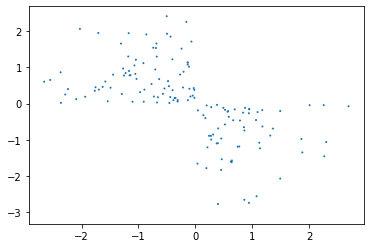

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)


"model1과 model2를 구축할 때 아래의 X & y를 사용하세요"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

plt.scatter(X[:,0], X[:,1], s=y)


### 단순 퍼셉트론 구현
Keras로 <b>sigmoid activation function</b>을 포함한 dense layer 1개가 있는</b> `model1`을 만들어 학습시키고 `h1`에 저장하세요.

In [20]:
model1 = tf.keras.models.Sequential()


model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
h1 = model1.fit(X, y, epochs=30)

Epoch 1/30
10/10 [==============================] - 1s 4ms/step - loss: 0.8092 - accuracy: 0.5100
Epoch 2/30
10/10 [==============================] - 0s 5ms/step - loss: 0.8044 - accuracy: 0.5100
Epoch 3/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7993 - accuracy: 0.5100
Epoch 4/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7948 - accuracy: 0.5100
Epoch 5/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7905 - accuracy: 0.5100
Epoch 6/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7862 - accuracy: 0.5067
Epoch 7/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7818 - accuracy: 0.5100
Epoch 8/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7776 - accuracy: 0.5100
Epoch 9/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7736 - accuracy: 0.5100
Epoch 10/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7698 - accuracy: 0.5100
Epoch 11/30
10/10 [


### Multi-Layer Perceptron (MLP)
이번에는 여러층의 레이어들을 쌓은 MLP 모델을 만들어보겠습니다. 아래는 간략한 가이드입니다 :
- 2개의 은닉층 (출력 수를 맞추는 것까지 3개의 Dense를 사용할 것은 추천)
- 노드의 개수는 8-32개 내에서 변경해서 사용해보세요.
- Activation function과 optimizer는 이번 주에 배운 것들 중에서 자유롭게 골라보세요.
- 아래 만들어진 Callback function을 모델에 통합해서 사용하세요

MLP로 만들어진 `model2` 를 만들어 학습하고 `h2`에 저장하세요.

In [3]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .90):   
            self.model.stop_training = True

In [32]:
model2 = tf.keras.models.Sequential()

model2.add(tf.keras.layers.Dense(12, activation='relu'))
model2.add(tf.keras.layers.Dense(8, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
h2 = model2.fit(X,y, epochs=30)

Epoch 1/30
10/10 [==============================] - 1s 3ms/step - loss: 0.6861 - accuracy: 0.5800
Epoch 2/30
10/10 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.5833
Epoch 3/30
10/10 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5800
Epoch 4/30
10/10 [==============================] - 0s 5ms/step - loss: 0.6762 - accuracy: 0.6033
Epoch 5/30
10/10 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.6300
Epoch 6/30
10/10 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.6933
Epoch 7/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.7700
Epoch 8/30
10/10 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.7833
Epoch 9/30
10/10 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.7967
Epoch 10/30
10/10 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.8100
Epoch 11/30
10/10 [

### Analyze and Compare

코드를 시작하기 전에 추가 라이브러리를 설치해야 합니다. 스프린트 과제에 사용 중인 환경에 패키지 `mlxtend`를 설치합니다. 설치코드를 직접 제작해보세요. 기존 자료들을 참고하면 쉽게 설치할 수 있을 것입니다. 

아래 셀은 모형의 의사결정 경계도("model1" 및 "model2")를 생성합니다. 그림을 검토합니다.

In [14]:
# mlxtend 라이브러리를 설치합니다
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)


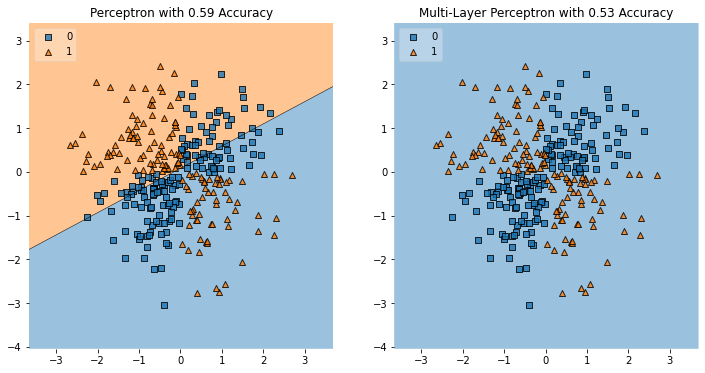

In [15]:
# 이 셀의 코드는 변경하지 마세요

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

#### 대부분의 Perceptron("model1")의 정확도가 50-70% 정도로 나오실 것인데요, 왜 그것밖에 되지 않을까요? <br> 데이터 X와 레이블 y의 관계를 보다 정확하게 학습할 수 있는 다층 퍼셉트론의 구조적인 특징은 무엇일까요? (설명을 하실 때 우리가 배웠었던 특징 추출의 관점에서 설명을 해보시길 바랍니다.)

답 : 데이터 분포가 혼합되어 있는 경우 하나의 경계로 구분하는 단순 OR Gate나 And Gate로 구분하기 어렵다. 이러한 경우 여러 경계를 바탕으로 데이터를 구분하는 XOR Gate를 구현하기 위해 다층 퍼셉트론을 사용해야 한다. 다층 퍼셉트론의 구조적인 특징은 은닉층을 둔다. 은닉층은 원래 특정 공간을 분류하는데 훨씬 유리한 새로운 특징 공간으로 변환한다 

## 3. Keras MLP 튜닝

이번에는 Keras 라이브러리를 사용하여 선택한 MultiLayer Perceptron(MLP) 아키텍처를 구현해보겠습니다. 극히 단순한 모델부터 복잡한 모델까지 만들어 보실 수 있습니다. 모델을 학습하고 정확도를 구해보세요. 
<br> 그런 다음 최소 <b>두 개</b>의 파라미터를 튜닝한 후에 다시 모형의 정확도를 구해보고 이전 모델과 비교해보세요. 
<br> 아래 Cell에서 심장병 데이터 세트를 불러 온 후 이진 분류 모델 (binary classification model) 을 만들어 보세요. 이진 분류 작업에 적절한 손실 함수를 사용하고, 신경망의 마지막 계층에서 적절한 출력값과 활성화 함수를 사용합니다. 
<br> 세부적인 출력을 사용하여 빠르게 수렴할 수 있도록 모델을 학습해보는 것도 중요합니다. GridSearchCV 또는 RandomSearchCV를 사용하여 모델을 하이퍼 파라미터들을 튜닝해봅니다. (최소 두 개의 하이퍼 파라미터를 튜닝해봅니다) 하이퍼 파라미터 튜닝 시 새로운 각 실험에 대해 코드 셀을 추가하여 작업하는 방법을 배워보았는데, 그대로 이용하지 말고 변형을 해서 보여주고 싶은 내용을 정리해서 보여주세요.  
<br> 테스트할 때 하이퍼 파라미터의 각 조합에 대한 정확도를 보고하여 가장 높은 정확도를 얻을 수 있는 결과를 쉽게 확인할 수 있도록 합니다. 
<br> 이 SC에서 **3점**을 얻으려면 **최소 3개의 파라미터**를 조정해야 합니다.

- BatchNormalization을 레이어에 추가하면 성능이 많이 오를 수 있습니다. 
- 하지만 BatchNormalization을 사용하기 위해서는 Batch_size 옵션을 추가해야 합니다.

In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0


In [44]:
target=df['target']
features=df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [46]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [47]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [48]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
8/8 [==============================] - 1s 4ms/step - loss: 122.2388 - accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 122.5309 - accuracy: 0.5165
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 123.0736 - accuracy: 0.4876
Epoch 4/30
8/8 [==============================] - 0s 4ms/step - loss: 122.5238 - accuracy: 0.5207
Epoch 5/30
8/8 [==============================] - 0s 4ms/step - loss: 101.4090 - accuracy: 0.5372
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 119.7694 - accuracy: 0.4917
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 128.2411 - accuracy: 0.4835
Epoch 8/30
8/8 [==============================] - 0s 5ms/step - loss: 117.8669 - accuracy: 0.4959
Epoch 9/30
8/8 [==============================] - 0s 4ms/step - loss: 99.5773 - accuracy: 0.5207
Epoch 10/30
8/8 [==============================] - 0s 4ms/step - loss: 75.1191 - accuracy: 0.5579
Epoch 11/30
8/8 [====

In [54]:
import numpy
import pandas as pd
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [50]:
numpy.random.seed(42)

In [51]:
def create_model():
    model = Sequential()
    model.add(Dense(100, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [52]:
model = KerasClassifier(build_fn=create_model, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [75]:

param_grid = dict(epochs=[10,20,30])


In [78]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1 )
grid_result = grid.fit(X_train, y_train, error_socre='raise')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/usr/loca

TypeError: ignored

In [69]:
grid.get_params()

{'cv': None,
 'error_score': nan,
 'estimator': <keras.wrappers.scikit_learn.KerasClassifier at 0x7f3d1d089b10>,
 'estimator__build_fn': <function __main__.create_model>,
 'estimator__verbose': 0,
 'n_jobs': 1,
 'param_grid': {'batch_size': [8, 16, 32, 64, 128],
  'n_hidden': [0, 1, 2, 3],
  'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
         52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
         69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
         86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}